In [1]:
#setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr

/var/folders/g4/6prfx6610k156f1shyw9gttm0000gn/T/ipykernel_63878/902706616.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
#read data
data = pd.read_csv("/Users/athenacasarotto/DS4A_data/obt_slimmer.csv")

In [3]:
data = data[data['series_themes_sum'] > 0]
data_census = (data.groupby(['fips','condition_name'], as_index=False)
       .agg({'number_of_discharges':'sum', 'number_of_readmissions':'sum','series_themes_sum':'mean','avg_medicare_beneficiaries_py':'sum','avg_number_white_beneficiaries_py':'sum','avg_number_beneficiaries_medicare_medicaid_py':'sum'})
       .rename(columns={'Missed':'Sum1', 'Credit':'Sum2','Grade':'Average'}))
data_census.head()

,fips,condition_name,number_of_discharges,number_of_readmissions,series_themes_sum,avg_medicare_beneficiaries_py,avg_number_white_beneficiaries_py,avg_number_beneficiaries_medicare_medicaid_py
0,1001020300,Chronic Obstructive Pulmonary Disease,127.0,17.0,7.6503,668.25,554.75,130.00
1,1001020300,Heart Failure,134.0,26.0,7.6503,668.25,554.75,130.00
2,1001020300,Pneumonia,151.0,24.0,7.6503,668.25,554.75,130.00
3,1003010500,Pneumonia,51.0,13.0,7.2909,295.50,238.75,65.00
4,1003011202,Chronic Obstructive Pulmonary Disease,78.0,11.0,8.0317,2279.00,2091.50,252.75


In [4]:
#add calculated fields
data_census["raw_readmission_rate"] = data_census.number_of_readmissions / data_census.number_of_discharges * 100
data_census["pct_beneficiaries_white"] = data_census.avg_number_white_beneficiaries_py / data_census.avg_medicare_beneficiaries_py * 100
data_census["pct_beneficiaries_medicare_medicaid"] = data_census.avg_number_beneficiaries_medicare_medicaid_py / data_census.avg_medicare_beneficiaries_py * 100
data_census.head()

,fips,condition_name,number_of_discharges,number_of_readmissions,series_themes_sum,avg_medicare_beneficiaries_py,avg_number_white_beneficiaries_py,avg_number_beneficiaries_medicare_medicaid_py,raw_readmission_rate,pct_beneficiaries_white,pct_beneficiaries_medicare_medicaid
0,1001020300,Chronic Obstructive Pulmonary Disease,127.0,17.0,7.6503,668.25,554.75,130.00,13.385827,83.015339,19.453797
1,1001020300,Heart Failure,134.0,26.0,7.6503,668.25,554.75,130.00,19.402985,83.015339,19.453797
2,1001020300,Pneumonia,151.0,24.0,7.6503,668.25,554.75,130.00,15.894040,83.015339,19.453797
3,1003010500,Pneumonia,51.0,13.0,7.2909,295.50,238.75,65.00,25.490196,80.795262,21.996616
4,1003011202,Chronic Obstructive Pulmonary Disease,78.0,11.0,8.0317,2279.00,2091.50,252.75,14.102564,91.772707,11.090391


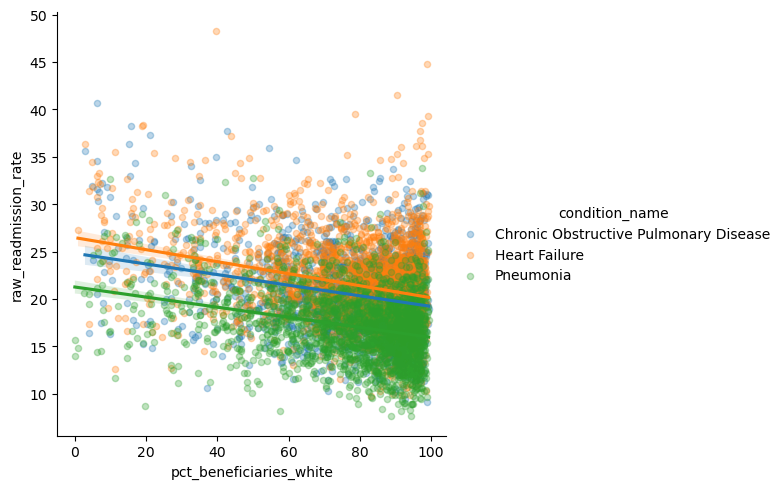

In [5]:
#plotting relationship between raw_readmission_rate, pct_beneficiaries_white, and condition_name
sns.lmplot(data = data_census, x = "pct_beneficiaries_white", y = "raw_readmission_rate",hue = "condition_name",scatter_kws={'s': 20, 'alpha': 0.3}, line_kws={'alpha': 1})


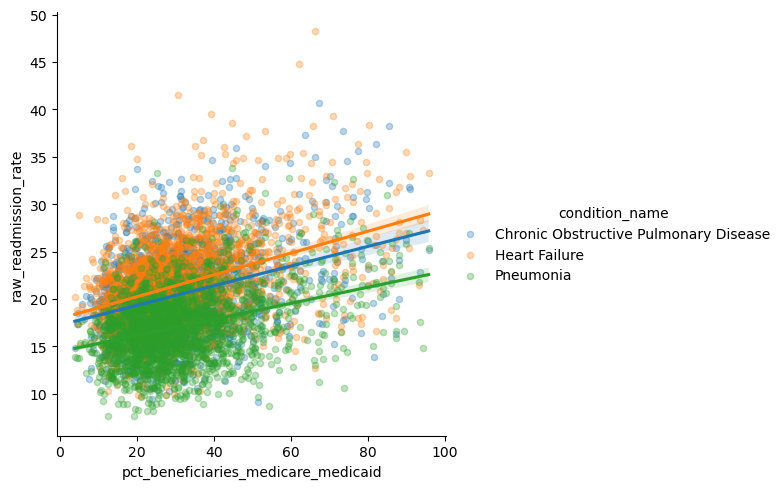

In [6]:
#plotting relationship between raw_readmission_rate, pct_beneficiaries_medicare_medicaid (dual enrollment), and condition_name
sns.lmplot(data = data_census, x = "pct_beneficiaries_medicare_medicaid", y = "raw_readmission_rate",hue = "condition_name",scatter_kws={'s': 20, 'alpha': 0.3}, line_kws={'alpha': 1})
